In [3]:
import tensorflow as tf

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
import matplotlib.pyplot as plt

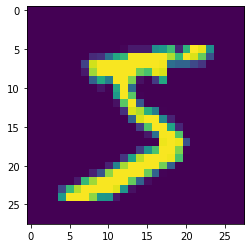

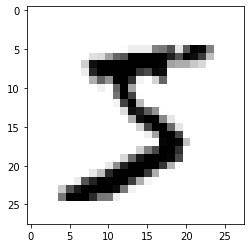

In [9]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [10]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

##Normailizing the data

In [15]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

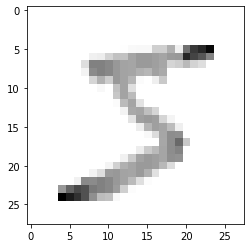

In [18]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

##Resizeing image to make it suitable for apply convolution

In [23]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)


##Create a Deep Neural Networks

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, Activation, MaxPooling2D


In [41]:
model = Sequential()
#first convolution layer
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layer one
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_10 (Activation)   (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)         

In [49]:
len(x_trainr)

60000

In [45]:
model.compile(loss= 'sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [55]:
model.fit(x_trainr,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0454 - accuracy: 0.9855
Epoch 2/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0352 - accuracy: 0.9892
Epoch 3/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0294 - accuracy: 0.9907
Epoch 4/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0249 - accuracy: 0.9922
Epoch 5/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0208 - accuracy: 0.9935


In [47]:
loss , acc = model.evaluate(x_testr,y_test)
print(loss)
print(acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0759 - accuracy: 0.9786
0.07586565613746643
0.978600025177002


In [51]:
predict = model.predict(x_testr)

In [52]:
print(predict)

[[4.3176289e-07 2.6640000e-05 1.8113386e-04 ... 9.9978310e-01
  3.2285533e-07 7.7104696e-06]
 [5.0936137e-06 5.1963607e-06 9.9998939e-01 ... 1.7390437e-07
  7.9763396e-08 2.4557869e-09]
 [1.3721350e-10 9.9999917e-01 2.6412715e-07 ... 2.0704913e-08
  1.5478571e-08 1.8403744e-08]
 ...
 [1.1460357e-10 2.7924665e-08 2.7643718e-10 ... 3.6472070e-08
  1.3389185e-07 3.5988370e-07]
 [2.6686527e-08 3.3069977e-10 6.6949335e-11 ... 1.2193292e-10
  4.7021757e-07 3.9003467e-08]
 [8.0677091e-06 1.7237097e-07 4.3648347e-06 ... 9.4392929e-09
  3.5467144e-06 3.9648143e-07]]


In [53]:
print(np.argmax(predict[0]))

7


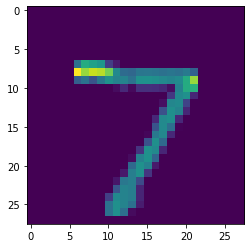

In [54]:
plt.imshow(x_test[0])